In [50]:
# importing necessary python libraries
import newspaper
import pandas as pd
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup as bs

# Making a get request
url = 'https://www.news24.com/'
web = requests.get(url)
# Creating a beautiful soup object to parse the HTML content
doc = bs(web.text, 'html.parser')

print(doc.prettify())


In [51]:
# importing necessary python libraries
import newspaper
import pandas as pd
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup as bs

# Making a get request
url = 'https://www.news24.com/'
web = requests.get(url)
# Creating a beautiful soup object to parse the HTML content
doc = bs(web.text, 'html.parser')

#print(doc.prettify())
# Trying to find news articles on the page
news_articles = doc.find_all('div', class_='article-list--container')


#page_title = soup.title.text
#print(page_title)

print(news_articles)

In [8]:
# 2.1

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Sending a request to the News24 website
url = 'https://www.news24.com/'
response = requests.get(url)

# Creating a BS object to parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Finding the news articles on the page
news_articles = soup.find_all('div', class_='article-list--container')

# Initializing lists to store the extracted data
news_num_list = []
news_title_list = []
news_date_list = []

# Extracting data from each news article
for index, article in enumerate(news_articles):
    # Extracting the news title
    news_title_e = article.find('div', class_='article-item__title')
    news_title = news_title_e.text.strip() if news_title_e else ''
    news_title_list.append(news_title)

    # Extracting the news date
    news_date_e = article.find('p', class_="article-item__date")
    news_date = news_date_e.text.strip() if news_date_e else ''
    news_date_list.append(news_date)

    # Assigning a news number
    news_num_list.append(index + 1)

# Creating DataFrame of the extracted data
data = {
    'news_num': news_num_list, # first column
    'news_title': news_title_list, # Second column
    'news_date': news_date_list # Third column
}
df = pd.DataFrame(data)

df_sorted = df.sort_values(by='news_num', ascending=False)

# Display the DataFrame
print(df_sorted)

    news_num                                         news_title news_date
26        27  How do you select the ideal backsplash for a k...    2h ago
25        26  Day One Dominance: 10 Proven Tactics to Shine ...    21 Jun
24        25  Speed, power, value: 7 reasons why the new Mac...    19 Jun
23        24        ANC puts Ace Magashule supporters on notice    22 Jun
22        23  FYN Restaurant in Cape Town named best sustain...    4h ago
21        22  What it's like to stay at Constance Ephelia, t...    18 Jun
20        21  Nobby Nic and Wicked Will - Why the best MTB t...    22 Jun
19        20  REVIEW | Walter Meyer’s brother tells a sad st...    6h ago
18        19                    Is your heater making you sick?    6h ago
17        18  REVIEW | BMW M340i: A top gun that doesn't nee...    6h ago
16        17  Four ways to have hard conversations with your...    22 Jun
15        16  Everything you need to know about the Basha Uh...    3h ago
14        15  New UK ambassador to Zim

In [49]:
# 2.2
from textblob import TextBlob
from textblob import Word
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.corpus import stopwords


# Updating my stopwords list
stops = stopwords.words('english')
custom_stopwords = [
    'is', 'in', 'not', 'to', 'and', 'it\'s', 'while', 'they', 'at', 'what', 'like', 'Your', 'are', 'here', 'over', 'as', 'opens',
    'the', 'A', 'a', 'I', 'it', 'on', 
]
stops = stops + custom_stopwords

#print(stops)

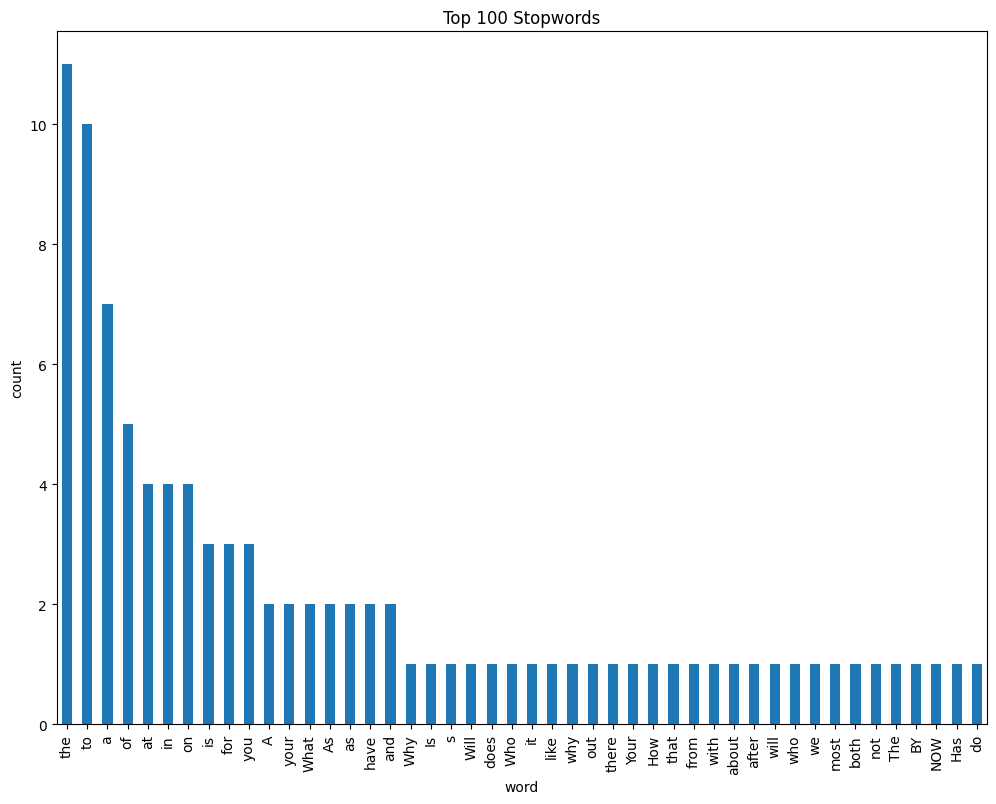

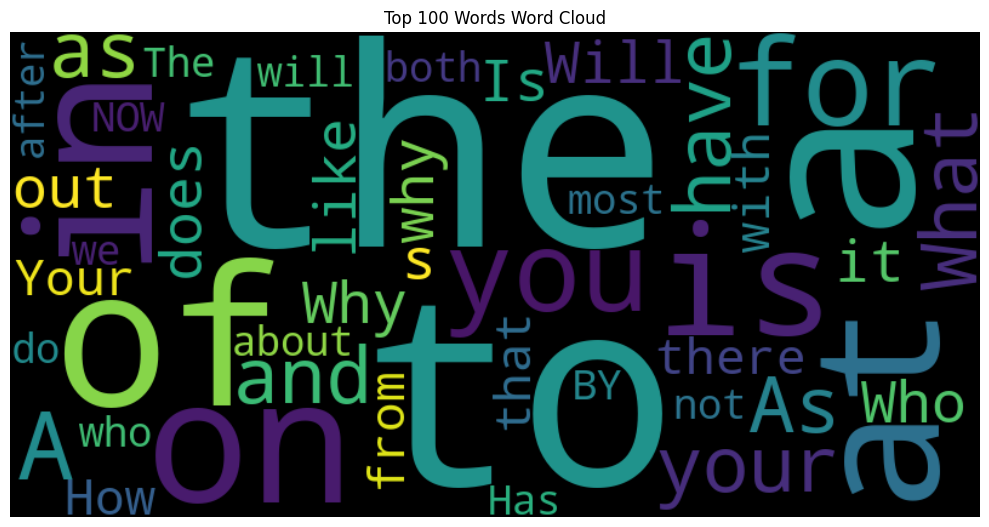

In [52]:
# 2.2 Bar graph and Word Cloud
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

stopwords_list = []
# Iterating over each news title and checking for stopwords
for news_title in df['news_title']:
    blob = TextBlob(news_title)
    word_counts = blob.word_counts.items()
    #print(blob)
    
    list_of_stopwords = [word for word in blob.words if word.lower() in stops]    
    # Adding the stopwords to a list called stopwords_list
    stopwords_list.extend(list_of_stopwords)

#print(stopwords_list)

# Calculating the frequency of each stopword
stopword_counts = pd.Series(stopwords_list).value_counts()

# Selecting the top 100 stopwords
top_100_stopwords = stopword_counts.head(100)

# Plotting the Bar Graph
plt.figure(figsize=(12,9))
top_100_stopwords.plot(kind='bar')
plt.xlabel('word')
plt.ylabel('count')
plt.title('Top 100 Stopwords')
plt.xticks(rotation=90)
plt.show()

# Creating a word cloud
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,
                      max_words=100, background_color='black').generate_from_frequencies(top_100_stopwords)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Words Word Cloud')
plt.tight_layout()
plt.show()

In [48]:
# 2.3

import nltk
import numpy as np
# Loading the Vader Library
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiating the VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Creating an empty list of the results 
sentiment_results = []

happiness_index = {}


# Iterating through each and every news title to get the polarity score of the title
for index, row in df.iterrows():
    news_title = row['news_title']
    date = row['news_date']
    
    scores = vader.polarity_scores(news_title)
    # Appending to the sentiment_results variable we created earlier on
    sentiment_results.append({
        'news_title': news_title,
        'date': date,
        'sentiment_scores': scores
    })
    # Accumulating the compound scores for each date    
    if date in happiness_index:
        happiness_index[date] += scores['compound']
    else:
        happiness_index[date] = scores['compound']

# Normalizing the happiness index by dividing by the number of news titles for each date
for date in happiness_index:
    count = df[df['news_date'] == date].shape[0]
    happiness_index[date] /= count
    
# Printing the sentiment analysis results
for result in sentiment_results:
    print("News Title:", result['news_title'])
    print("Date:", result['date'])
    print("Sentiment Scores:", result['sentiment_scores'])
    print()

# Printing the date and the aggregate happiness index of each date    
for date, index in happiness_index.items():
    print(f"Date: {date}")
    print("Aggregated Happiness Index:", index)
    print()



News Title: Who died on tourist submersible to Titanic wreckage?
Date: 4h ago
Sentiment Scores: {'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.5574}

News Title: SA power crisis presents 'very promising' opportunity for Russia, says ambassador
Date: 6h ago
Sentiment Scores: {'neg': 0.226, 'neu': 0.44, 'pos': 0.334, 'compound': 0.2433}

News Title: LISTEN | Missing Titan: Has the rescue mission become a recovery?
Date: 22 Jun
Sentiment Scores: {'neg': 0.176, 'neu': 0.56, 'pos': 0.264, 'compound': 0.2732}

News Title: BUY NOW | News24 wine editor Daléne Fourie curates limited edition wine box
Date: 21 Jun
Sentiment Scores: {'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.2263}

News Title: WATCH | Four dead as tornado scours heat-stricken Texas
Date: 22 Jun
Sentiment Scores: {'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.6486}

News Title: CARTOON BY CARLOS | The Russia-SA trade relationship
Date: 22 Jun
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

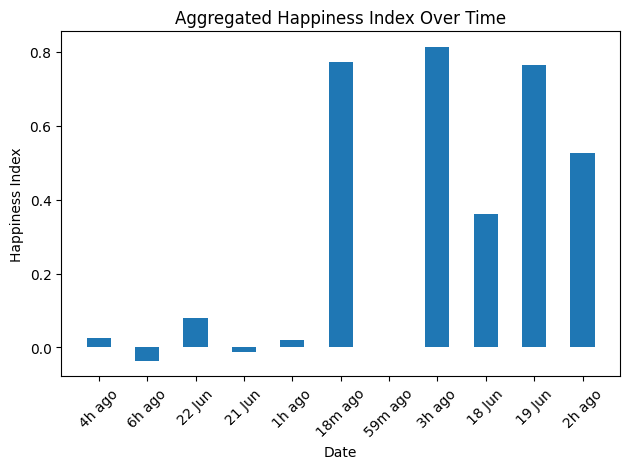

In [47]:
# 2.3 plotting the bar graph
import matplotlib.pyplot as plt

# Extracting the dates and happiness index values from the dictionary
dates = list(happiness_index.keys())
happiness_scores = list(happiness_index.values())

# Creating an array of indices to position the bars on the x-axis
x_indices = np.arange(len(dates))

# Plotting the bar graph
plt.bar(x_indices, happiness_scores, width=0.5)
plt.xlabel('Date')
plt.ylabel('Happiness Index')
plt.title('Aggregated Happiness Index Over Time')
plt.xticks(x_indices, dates, rotation=45)

plt.tight_layout()
plt.show()   